Notebook Desenvolvido por: **Matheus Terra**

Repositório: https://github.com/matheusfterra/B4Bank

Dataset: https://github.com/matheusfterra/B4Bank/blob/master/datasets/data_scientist_case.xlsx

Relatório: https://ifgoias-my.sharepoint.com/:b:/g/personal/matheus_terra_academico_ifg_edu_br/Eac3v2tlmi1IuusADSLF1aUBjFUhOWKm6fZDZ_Y_nZTQIw?e=tt5HgY

Dashboard: https://app.powerbi.com/view?r=eyJrIjoiZDAzZTc5ZjgtNDM2Mi00NmE4LWJmNjgtMDJhOTJkZTAzZTYwIiwidCI6IjIyNjRkOGM2LWNlMTQtNDBkMS1iMGQ5LTMyYTEzZWM2NmI1OSJ9&pageName=ReportSection90d0a2badfaddb304c27

Análise de Dados
===============

In [18]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import datetime
from operator import truediv

import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
plt.style.use('bmh')

!pip install xlsxwriter
import xlsxwriter

In [19]:
#Get data_file
# O dataset utilizado para execução encontra-se em: https://github.com/matheusfterra/B4Bank/blob/master/datasets/data_scientist_case.xlsx

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

filename=fn
print(filename)

Saving data_scientist_case.xlsx to data_scientist_case.xlsx
User uploaded file "data_scientist_case.xlsx" with length 345122 bytes
data_scientist_case.xlsx


In [20]:
#Criação dos Dataframes
df1 = pd.read_excel(filename, sheet_name='Reviews_Bank')
df2 = pd.read_excel(filename, sheet_name='Retained_Bank')

In [21]:
#Padronização das colunas
df1.columns = df1.columns.str.replace(' ','_')
df1.columns = df1.columns.str.replace('-','_')
df2.columns = df2.columns.str.replace(' ','_')
df2.columns = df2.columns.str.replace('-','_')


In [22]:
#Visualização dos dados
df1


,Package_Name,App_Version_Name,Reviewer_Language,Device,Review_Last_Update_Date_and_Time,Star_Rating,Review_Title,Review_Text,Sentiment
0,B4 Bank,6.10.6,pt,greatlte,2019-10-01T00:09:07Z,5,NaN,NaN,Positive
1,B4 Bank,6.10.6,pt,mido,2019-10-01T00:18:49Z,5,NaN,NaN,Positive
2,B4 Bank,6.10.6,pt,on5xelte,2019-10-01T00:34:35Z,5,NaN,Boa,Positive
3,B4 Bank,6.10.6,pt,dreamlte,2019-10-01T00:44:18Z,2,NaN,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
4,B4 Bank,6.10.6,pt,starqltechn,2019-10-01T01:09:56Z,4,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...
5674,B4 Bank,6.10.5,pt,hlte,2019-08-31T21:51:26Z,1,NaN,"Baixei a última versão recentemente, ainda não...",NaN
5675,B4 Bank,6.10.5,pt,potter_nt,2019-08-31T22:36:38Z,4,NaN,NaN,NaN
5676,B4 Bank,4.1.7,pt,j4primelte,2019-08-31T22:44:22Z,5,NaN,NaN,NaN
5677,B4 Bank,6.10.5,pt,K10a40,2019-08-31T23:39:14Z,5,NaN,"Gostei muito prático, descomplicado",NaN


In [23]:
df2

,Date,Package_Name,Acquisition_Channel,Store_Listing_Visitors,Installers,Visitor_to_Installer_conversion_rate,Installers_retained_for_1_day,Installer_to_1_day_retention_rate,Installers_retained_for_7_days,Installer_to_7_days_retention_rate,Installers_retained_for_15_days,Installer_to_15_days_retention_rate,Installers_retained_for_30_days,Installer_to_30_days_retention_rate
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
1,2019-08-01 00:00:00,B4 Bank,Third-party referrers,514,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652
2,2019-08-01 00:00:00,B4 Bank,Other,113,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
4,2019-08-02 00:00:00,B4 Bank,Tracked channels (UTM),55,10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2019-10-29 00:00:00,B4 Bank,Other,55,12,0.218,7,0.583,6,0.500,6,0.500,6,0.500
313,2019-10-30 00:00:00,B4 Bank,Organic,2457,545,0.222,437,0.802,402,0.738,386,0.708,374,0.686
314,2019-10-30 00:00:00,B4 Bank,Tracked channels (UTM),207,15,0.072,8,0.533,6,0.400,6,0.400,6,0.400
315,2019-10-30 00:00:00,B4 Bank,Third-party referrers,2625,207,0.079,123,0.594,104,0.502,96,0.464,83,0.401


In [24]:
#Análise dos tipos de valores
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Package_Name                      5679 non-null   object
 1   App_Version_Name                  5423 non-null   object
 2   Reviewer_Language                 5679 non-null   object
 3   Device                            5673 non-null   object
 4   Review_Last_Update_Date_and_Time  5679 non-null   object
 5   Star_Rating                       5679 non-null   int64 
 6   Review_Title                      1 non-null      object
 7   Review_Text                       2756 non-null   object
 8   Sentiment                         1428 non-null   object
dtypes: int64(1), object(8)
memory usage: 399.4+ KB


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  317 non-null    object 
 1   Package_Name                          317 non-null    object 
 2   Acquisition_Channel                   317 non-null    object 
 3   Store_Listing_Visitors                317 non-null    int64  
 4   Installers                            317 non-null    int64  
 5   Visitor_to_Installer_conversion_rate  317 non-null    float64
 6   Installers_retained_for_1_day         317 non-null    int64  
 7   Installer_to_1_day_retention_rate     317 non-null    float64
 8   Installers_retained_for_7_days        317 non-null    int64  
 9   Installer_to_7_days_retention_rate    317 non-null    float64
 10  Installers_retained_for_15_days       317 non-null    int64  
 11  Installer_to_15_day

In [26]:
#Verificação dos tipos de Canais
df2.Acquisition_Channel.unique()

array(['Organic', 'Third-party referrers', 'Other',
       'Tracked channels (UTM)'], dtype=object)

In [27]:
#Conversão da coluna Date para objeto Data
df2["Date"]= pd.to_datetime(df2["Date"], errors='coerce') 
df2.info()
#Com a conversão da data, observa-se que 4 valores são tidos como nulo de acordo com a coluna Non-Null, logo, é necessário desconsiderá-las

df2.replace({'NaT': np.nan})
df2=df2.dropna(subset=['Date'])
df2.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  313 non-null    datetime64[ns]
 1   Package_Name                          317 non-null    object        
 2   Acquisition_Channel                   317 non-null    object        
 3   Store_Listing_Visitors                317 non-null    int64         
 4   Installers                            317 non-null    int64         
 5   Visitor_to_Installer_conversion_rate  317 non-null    float64       
 6   Installers_retained_for_1_day         317 non-null    int64         
 7   Installer_to_1_day_retention_rate     317 non-null    float64       
 8   Installers_retained_for_7_days        317 non-null    int64         
 9   Installer_to_7_days_retention_rate    317 non-null    float64       
 10  In

In [28]:
#Algoritmo para agrupamento das semanas, visitas ao app, taxa de instalação, e retenções
week=[]
visit=[]
installer=[]
rate=[]
retention_1=[]
retention_7=[]
retention_15=[]
retention_30=[]

value_visit=0
value_install=0
value_retention_1=0
value_retention_7=0
value_retention_15=0
value_retention_30=0

for i in range(0,len(df2["Date"])):
  semana=df2["Date"][i].isocalendar()[1]
  
  if semana not in week:
    week.append(semana)
    if i!=0:
      visit.append(value_visit)
      installer.append(value_install)
      rate.append(value_install/value_visit)
      retention_1.append(value_retention_1)
      retention_7.append(value_retention_7)
      retention_15.append(value_retention_15)
      retention_30.append(value_retention_30)

    value_visit=df2["Store_Listing_Visitors"][i]
    value_install=df2["Installers"][i]
    value_retention_1=df2["Installers_retained_for_1_day"][i]
    value_retention_7=df2["Installers_retained_for_7_days"][i]
    value_retention_15=df2["Installers_retained_for_15_days"][i]
    value_retention_30=df2["Installers_retained_for_30_days"][i]
  else:
    value_visit=value_visit+df2["Store_Listing_Visitors"][i]
    value_install=value_install+df2["Installers"][i]
    value_retention_1=value_retention_1+df2["Installers_retained_for_1_day"][i]
    value_retention_7=value_retention_7+df2["Installers_retained_for_7_days"][i]
    value_retention_15=value_retention_15+df2["Installers_retained_for_15_days"][i]
    value_retention_30=value_retention_30+df2["Installers_retained_for_30_days"][i]

visit.append(value_visit)
installer.append(value_install)
rate.append(value_install/value_visit)
rate = [i * 100 for i in rate]
rate = [round(num, 2) for num in rate]

retention_1.append(value_retention_1)
retention_7.append(value_retention_7)
retention_15.append(value_retention_15)
retention_30.append(value_retention_30)

In [29]:
#Usando plotly Scatter 
time_plot_1=go.Figure(go.Scatter(x=week, y=visit,
                                 mode='lines+markers', line={'color': 'red'}))
#Alteraçã do Layout
time_plot_1.update_layout(title='Visitas ao APP por semana',
                   xaxis_title='Semana',
                   yaxis_title='Visitas')
#Apresentando a Figura
time_plot_1.show()

**EXPORT**

In [30]:
#Ao decorrer do notebook, diversos Dataframes são criados para exportação dos dados limpos para o Power BI
df_export_semanal=pd.DataFrame()
df_export_semanal["Semana"]=week
df_export_semanal["Visitas"]=visit
df_export_semanal

,Semana,Visitas
0,31,8637
1,32,11304
2,33,10519
3,34,13514
4,35,15584
5,36,15206
6,37,15919
7,38,15765
8,39,35647
9,40,45818


In [31]:
#Criação de uma coluna para representação de qual dia da semana, a data corresponde
df2['Dia']=df2['Date'].dt.weekday
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Package_Name,Acquisition_Channel,Store_Listing_Visitors,Installers,Visitor_to_Installer_conversion_rate,Installers_retained_for_1_day,Installer_to_1_day_retention_rate,Installers_retained_for_7_days,Installer_to_7_days_retention_rate,Installers_retained_for_15_days,Installer_to_15_days_retention_rate,Installers_retained_for_30_days,Installer_to_30_days_retention_rate,Dia
0,2019-08-01,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797,3
1,2019-08-01,B4 Bank,Third-party referrers,514,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652,3
2,2019-08-01,B4 Bank,Other,113,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565,3
3,2019-08-02,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791,4
4,2019-08-02,B4 Bank,Tracked channels (UTM),55,10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2019-10-29,B4 Bank,Other,55,12,0.218,7,0.583,6,0.500,6,0.500,6,0.500,1
309,2019-10-30,B4 Bank,Organic,2457,545,0.222,437,0.802,402,0.738,386,0.708,374,0.686,2
310,2019-10-30,B4 Bank,Tracked channels (UTM),207,15,0.072,8,0.533,6,0.400,6,0.400,6,0.400,2
311,2019-10-30,B4 Bank,Third-party referrers,2625,207,0.079,123,0.594,104,0.502,96,0.464,83,0.401,2


In [32]:
#Criação de Dataframes de acordo com o dia da semana correspondente 
df_segunda=df2.loc[df2['Dia']==0]
df_terca=df2.loc[df2['Dia']==1]
df_quarta=df2.loc[df2['Dia']==2]
df_quinta=df2.loc[df2['Dia']==3]
df_sexta=df2.loc[df2['Dia']==4]
df_sabado=df2.loc[df2['Dia']==5]
df_domingo=df2.loc[df2['Dia']==6]


In [33]:
#Somatorio da quantidade de visitas por dias das semanas
soma_segunda=df_segunda.Store_Listing_Visitors.sum()
soma_terca=df_terca.Store_Listing_Visitors.sum()
soma_quarta=df_quarta.Store_Listing_Visitors.sum()
soma_quinta=df_quinta.Store_Listing_Visitors.sum()
soma_sexta=df_sexta.Store_Listing_Visitors.sum()
soma_sabado=df_sabado.Store_Listing_Visitors.sum()
soma_domingo=df_domingo.Store_Listing_Visitors.sum()

soma_dia=[soma_segunda,soma_terca,soma_quarta,soma_quinta,soma_sexta,soma_sabado,soma_domingo]

dia_semana=['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']


In [34]:
#Gráfico de Barras
bar_plot=px.bar(x=dia_semana, y=soma_dia,color=soma_dia, color_continuous_scale='Reds',
           labels={'x':'Dias da Semana', 'y':'Visitas'})
#Alteração do Layout
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Visitas por dia da Semana')
#Saída do gráfico
bar_plot.show()

**EXPORT**

In [35]:
df_export_diario=pd.DataFrame()
df_export_diario["Dia"]=dia_semana
df_export_diario["Visitas"]=soma_dia
df_export_diario

,Dia,Visitas
0,Segunda-Feira,43838
1,Terça-Feira,31607
2,Quarta-Feira,48406
3,Quinta-Feira,51246
4,Sexta-Feira,52772
5,Sábado,47677
6,Domingo,49347


In [36]:
#Tentativa falha de preparação do Dataset para plotagem de barras por agrupamento. Encontrou-se uma solução mais simples e prática para economizar tempo.
df2_pivot=pd.melt(df2,id_vars=['Dia'],var_name='Acquisition_Channel', value_name='Store_Listing_Visitors')
df2_pivot

,Dia,Acquisition_Channel,Store_Listing_Visitors
0,3,Date,2019-08-01 00:00:00
1,3,Date,2019-08-01 00:00:00
2,3,Date,2019-08-01 00:00:00
3,4,Date,2019-08-02 00:00:00
4,4,Date,2019-08-02 00:00:00
...,...,...,...
4377,1,Installer_to_30_days_retention_rate,0.5
4378,2,Installer_to_30_days_retention_rate,0.686
4379,2,Installer_to_30_days_retention_rate,0.4
4380,2,Installer_to_30_days_retention_rate,0.401


In [37]:
#Criação de Array com os tipos de canais de aquisição
type_acquisition=df2.Acquisition_Channel.unique()
type_acquisition

array(['Organic', 'Third-party referrers', 'Other',
       'Tracked channels (UTM)'], dtype=object)

In [38]:
#Algoritmo para contagem das visitas por canal individual e contagem das instalações por canal individual

visit_organic=[]
visit_third_party=[]
visit_other=[]
visit_tracked_channels=[]

installed_organic=[]
installed_third_party=[]
installed_other=[]
installed_tracked_channels=[]

for i in range(0,7):
  value=df2.loc[(df2['Acquisition_Channel']=='Organic') & (df2['Dia']==i)].Store_Listing_Visitors.sum()
  value2=df2.loc[(df2['Acquisition_Channel']=='Organic') & (df2['Dia']==i)].Installers.sum()
  
  visit_organic.append(value)
  installed_organic.append(value2)

for i in range(0,7):
  value=df2.loc[(df2['Acquisition_Channel']=='Third-party referrers') & (df2['Dia']==i)].Store_Listing_Visitors.sum()
  value2=df2.loc[(df2['Acquisition_Channel']=='Third-party referrers') & (df2['Dia']==i)].Installers.sum()

  visit_third_party.append(value)
  installed_third_party.append(value2)

for i in range(0,7):
  value=df2.loc[(df2['Acquisition_Channel']=='Other')& (df2['Dia']==i)].Store_Listing_Visitors.sum()
  value2=df2.loc[(df2['Acquisition_Channel']=='Other') & (df2['Dia']==i)].Installers.sum()

  visit_other.append(value)
  installed_other.append(value2)

for i in range(0,7):
  value=df2.loc[(df2['Acquisition_Channel']=='Tracked channels (UTM)')& (df2['Dia']==i)].Store_Listing_Visitors.sum()
  value2=df2.loc[(df2['Acquisition_Channel']=='Tracked channels (UTM)') & (df2['Dia']==i)].Installers.sum()

  visit_tracked_channels.append(value)
  installed_tracked_channels.append(value2)

visit_organic

[24926, 18104, 24662, 29271, 31152, 27709, 27751]

In [39]:
#Plotagem de gráfico com barras agrupadas

fig2 = go.Figure(
    data=[
        go.Bar(
            name="Organic",
            x=dia_semana,
            y=visit_organic,
            offsetgroup=0,
            text=visit_organic,
            textposition='auto',
        ),
        go.Bar(
            name="Third-party referrers",
            x=dia_semana,
            y=visit_third_party,
            offsetgroup=1,
            text=visit_third_party,
            textposition='auto',
        ),
        go.Bar(
            name="Tracked channels (UTM)",
            x=dia_semana,
            y=visit_tracked_channels,
            offsetgroup=2,
            text=visit_tracked_channels,
            textposition='auto',
        ),
        go.Bar(
            name="Other",
            x=dia_semana,
            y=visit_other,
            offsetgroup=3,
            text=visit_other,
            textposition='auto',
        ),
    ],
    layout=go.Layout(
        title="Visibilidade por dia da Semana",
        yaxis_title="Visitas",
        xaxis_title="Dias da Semana"
    )
)
fig2.show()

**EXPORT**

In [40]:
df_export_diario["Dia"]=dia_semana
df_export_diario["Visitas_organic"]=visit_organic
df_export_diario["Visitas_third_party"]=visit_third_party
df_export_diario["Visitas_tracked_channels"]=visit_tracked_channels
df_export_diario["Visitas_other"]=visit_other
df_export_diario

,Dia,Visitas,Visitas_organic,Visitas_third_party,Visitas_tracked_channels,Visitas_other
0,Segunda-Feira,43838,24926,13289,4617,1006
1,Terça-Feira,31607,18104,9150,3680,673
2,Quarta-Feira,48406,24662,18927,4073,744
3,Quinta-Feira,51246,29271,17314,3633,1028
4,Sexta-Feira,52772,31152,16539,4101,980
5,Sábado,47677,27709,15302,3748,918
6,Domingo,49347,27751,16844,3949,803


In [41]:
#Preparação dos dados para apresentação em gráfico de barras totais
total_organic=sum(visit_organic)
total_third_party=sum(visit_third_party)
total_other=sum(visit_other)
total_tracked_channels=sum(visit_tracked_channels)

total_type_acquisition=[total_organic,total_third_party,total_other,total_tracked_channels]

#Gráfico de Barras
bar_plot=px.bar(x=type_acquisition, y=total_type_acquisition ,color=total_type_acquisition, color_continuous_scale='Reds',
           labels={'x':'Tipos de Aquisição', 'y':'Visitas'}, text=total_type_acquisition)
#Alteração do Layout
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Visitas por método de Aquisição')
#Saída do gráfico
bar_plot.show()

**EXPORT**

In [42]:
df_export_canal=pd.DataFrame()
df_export_canal["Canal"]=type_acquisition
df_export_canal["Visitas"]=total_type_acquisition
df_export_canal

,Canal,Visitas
0,Organic,183575
1,Third-party referrers,107365
2,Other,6152
3,Tracked channels (UTM),27801


In [43]:
df2

,Date,Package_Name,Acquisition_Channel,Store_Listing_Visitors,Installers,Visitor_to_Installer_conversion_rate,Installers_retained_for_1_day,Installer_to_1_day_retention_rate,Installers_retained_for_7_days,Installer_to_7_days_retention_rate,Installers_retained_for_15_days,Installer_to_15_days_retention_rate,Installers_retained_for_30_days,Installer_to_30_days_retention_rate,Dia
0,2019-08-01,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797,3
1,2019-08-01,B4 Bank,Third-party referrers,514,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652,3
2,2019-08-01,B4 Bank,Other,113,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565,3
3,2019-08-02,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791,4
4,2019-08-02,B4 Bank,Tracked channels (UTM),55,10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2019-10-29,B4 Bank,Other,55,12,0.218,7,0.583,6,0.500,6,0.500,6,0.500,1
309,2019-10-30,B4 Bank,Organic,2457,545,0.222,437,0.802,402,0.738,386,0.708,374,0.686,2
310,2019-10-30,B4 Bank,Tracked channels (UTM),207,15,0.072,8,0.533,6,0.400,6,0.400,6,0.400,2
311,2019-10-30,B4 Bank,Third-party referrers,2625,207,0.079,123,0.594,104,0.502,96,0.464,83,0.401,2


In [44]:
#Somatorio das instalações por dias da semana
instalacoes_segunda=df_segunda.Installers.sum()
instalacoes_terca=df_terca.Installers.sum()
instalacoes_quarta=df_quarta.Installers.sum()
instalacoes_quinta=df_quinta.Installers.sum()
instalacoes_sexta=df_sexta.Installers.sum()
instalacoes_sabado=df_sabado.Installers.sum()
instalacoes_domingo=df_domingo.Installers.sum()

instalacoes_dia=[instalacoes_segunda,instalacoes_terca,instalacoes_quarta,instalacoes_quinta,instalacoes_sexta,instalacoes_sabado,instalacoes_domingo]
instalacoes_dia

[6131, 3994, 5766, 7514, 7373, 7070, 7309]

In [45]:
#Plotagem de gráfico VisitasXInstalação por dia da semana
fig2 = go.Figure(
    data=[
        go.Bar(
            name="Visitas",
            x=dia_semana,
            y=soma_dia,
            offsetgroup=0,
            text=soma_dia,
            textposition='auto',
        ),
        go.Bar(
            name="Instalações",
            x=dia_semana,
            y=instalacoes_dia,
            offsetgroup=1,
            text=instalacoes_dia,
            textposition='auto',
        ),
      
    ],
    layout=go.Layout(
        title="Visibilidade X Instalações",
        yaxis_title="Quantidades",
        xaxis_title="Dias da Semana"
    )
)
fig2.show()

**EXPORT**

In [46]:
df_export_diario["Instalacoes"]=instalacoes_dia
df_export_diario

,Dia,Visitas,Visitas_organic,Visitas_third_party,Visitas_tracked_channels,Visitas_other,Instalacoes
0,Segunda-Feira,43838,24926,13289,4617,1006,6131
1,Terça-Feira,31607,18104,9150,3680,673,3994
2,Quarta-Feira,48406,24662,18927,4073,744,5766
3,Quinta-Feira,51246,29271,17314,3633,1028,7514
4,Sexta-Feira,52772,31152,16539,4101,980,7373
5,Sábado,47677,27709,15302,3748,918,7070
6,Domingo,49347,27751,16844,3949,803,7309


In [47]:
#Plotagem do gráfico de linha para análise da tendência de instalações
#Usando plotly Scatter 
time_plot_1=go.Figure(go.Scatter(x=week, y=installer,
                                 mode='lines+markers', line={'color': 'red'}))
#Alteraçã do Layout
time_plot_1.update_layout(title='Instalações do APP por semana',
                   xaxis_title='Semana',
                   yaxis_title='Instalações')
#Apresentando a Figura
time_plot_1.show()

**EXPORT**

In [48]:
df_export_semanal["Instalacoes"]=installer

In [49]:
#Plotagem de histórico considerando a taxa de conversão

#Usando plotly Scatter 
time_plot_1=go.Figure(go.Scatter(x=week, y=rate,
                                 mode='lines+markers', line={'color': 'red'}))
#Alteraçã do Layout
time_plot_1.update_layout(title='Taxa de Conversão do APP por semana',
                   xaxis_title='Semana',
                   yaxis_title='Taxa (%)')
#Apresentando a Figura
time_plot_1.show()

**EXPORT**

In [50]:
df_export_semanal["Taxa_conversao"]=rate

In [51]:
#Preparação da Taxa para análise diária em gráfico

taxa_diaria = list(map(truediv, instalacoes_dia, soma_dia))
taxa_diaria = [i * 100 for i in taxa_diaria]
taxa_diaria = [round(num, 2) for num in taxa_diaria]
taxa_diaria

[13.99, 12.64, 11.91, 14.66, 13.97, 14.83, 14.81]

In [52]:
#Gráfico de Barras
bar_plot=px.bar(x=dia_semana, y=taxa_diaria,
           labels={'x':'Dias da semana', 'y':'Taxa (%)'})
#Alteração do Layout
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Média de Taxa de Aquisição por dia')
#Saída do gráfico
bar_plot.show()

**EXPORT**

In [53]:
df_export_diario["Taxa_Conversao"]=taxa_diaria

In [54]:
#Algoritmo para preparação dos dados de instalações por canal 

installed_total_organic=sum(installed_organic)
installed_total_third_party=sum(installed_third_party)
installed_total_other=sum(installed_other)
installed_total_tracked_channels=sum(installed_tracked_channels)

installed_total_type_acquisition=[installed_total_organic,installed_total_third_party,installed_total_other,installed_total_tracked_channels]

taxa_acquisition = list(map(truediv, installed_total_type_acquisition, total_type_acquisition))
taxa_acquisition = [i * 100 for i in taxa_acquisition]
taxa_acquisition = [round(num, 2) for num in taxa_acquisition]
print(taxa_acquisition)

#Gráfico de Barras
bar_plot=px.bar(x=type_acquisition, y=taxa_acquisition ,color=taxa_acquisition, color_continuous_scale='Reds',
           labels={'x':'Tipos de Aquisição', 'y':'Taxa (%)'}, text=taxa_acquisition)
#Alteração do Layout
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Taxa de Aquisição por método')
#Saída do gráfico
bar_plot.show()

[18.36, 8.99, 19.0, 2.27]


**EXPORT**

In [55]:
df_export_canal["Taxa_conversao"]=taxa_acquisition

In [56]:
#Algoritmo de preparação dos dados para plotagem da retenção por quantidade de dias e por canal

taxa_organic=[]
taxa_third_party=[]
taxa_other=[]
taxa_tracked_channels=[]


taxa_organic.append(df2.loc[(df2['Acquisition_Channel']=='Organic')].Installers_retained_for_1_day.sum())
taxa_organic.append(df2.loc[(df2['Acquisition_Channel']=='Organic')].Installers_retained_for_7_days.sum())
taxa_organic.append(df2.loc[(df2['Acquisition_Channel']=='Organic')].Installers_retained_for_15_days.sum())
taxa_organic.append(df2.loc[(df2['Acquisition_Channel']=='Organic')].Installers_retained_for_30_days.sum())
taxa_organic=(taxa_organic/installed_total_organic)*100
taxa_organic = [round(num, 2) for num in taxa_organic]

taxa_third_party.append(df2.loc[(df2['Acquisition_Channel']=='Third-party referrers')].Installers_retained_for_1_day.sum())
taxa_third_party.append(df2.loc[(df2['Acquisition_Channel']=='Third-party referrers')].Installers_retained_for_7_days.sum())
taxa_third_party.append(df2.loc[(df2['Acquisition_Channel']=='Third-party referrers')].Installers_retained_for_15_days.sum())
taxa_third_party.append(df2.loc[(df2['Acquisition_Channel']=='Third-party referrers')].Installers_retained_for_30_days.sum())
taxa_third_party=(taxa_third_party/installed_total_third_party)*100
taxa_third_party = [round(num, 2) for num in taxa_third_party]

taxa_other.append(df2.loc[(df2['Acquisition_Channel']=='Other')].Installers_retained_for_1_day.sum())
taxa_other.append(df2.loc[(df2['Acquisition_Channel']=='Other')].Installers_retained_for_7_days.sum())
taxa_other.append(df2.loc[(df2['Acquisition_Channel']=='Other')].Installers_retained_for_15_days.sum())
taxa_other.append(df2.loc[(df2['Acquisition_Channel']=='Other')].Installers_retained_for_30_days.sum())
taxa_other=(taxa_other/installed_total_other)*100
taxa_other = [round(num, 2) for num in taxa_other]

taxa_tracked_channels.append(df2.loc[(df2['Acquisition_Channel']=='Tracked channels (UTM)')].Installers_retained_for_1_day.sum())
taxa_tracked_channels.append(df2.loc[(df2['Acquisition_Channel']=='Tracked channels (UTM)')].Installers_retained_for_7_days.sum())
taxa_tracked_channels.append(df2.loc[(df2['Acquisition_Channel']=='Tracked channels (UTM)')].Installers_retained_for_15_days.sum())
taxa_tracked_channels.append(df2.loc[(df2['Acquisition_Channel']=='Tracked channels (UTM)')].Installers_retained_for_30_days.sum())
taxa_tracked_channels=(taxa_tracked_channels/installed_total_tracked_channels)*100
taxa_tracked_channels = [round(num, 2) for num in taxa_tracked_channels]

taxa_organic


[88.75, 84.82, 82.65, 80.38]

In [57]:
time=['1 Dia','7 Dias','15 Dias','30 Dias']
fig2 = go.Figure(
    data=[
        go.Bar(
            name="Organic",
            x=time,
            y=taxa_organic,
            offsetgroup=0,
            text=taxa_organic,
            textposition='auto',
        ),
        go.Bar(
            name="Third-party referrers",
            x=time,
            y=taxa_third_party,
            offsetgroup=1,
            text=taxa_third_party,
            textposition='auto',
        ),
        go.Bar(
            name="Other",
            x=time,
            y=taxa_other,
            offsetgroup=2,
            text=taxa_other,
            textposition='auto',
        ),
        go.Bar(
            name="Tracked channels (UTM)",
            x=time,
            y=taxa_tracked_channels,
            offsetgroup=3,
            text=taxa_tracked_channels,
            textposition='auto',
        ),
    ],
    layout=go.Layout(
        title="Retenção por Canal",
        yaxis_title="Retenção (%)",
        xaxis_title="Duração"
    )
)
fig2.show()

**EXPORT**

In [58]:
df_export_retencao=pd.DataFrame()
df_export_retencao["Periodo"]=time
df_export_retencao["Retencao_organic"]=taxa_organic
df_export_retencao["Retencao_third_party"]=taxa_third_party
df_export_retencao["Retencao_other"]=taxa_other
df_export_retencao["Retencao_tracked_channels"]=taxa_tracked_channels
df_export_retencao

,Periodo,Retencao_organic,Retencao_third_party,Retencao_other,Retencao_tracked_channels
0,1 Dia,88.75,69.99,88.88,78.48
1,7 Dias,84.82,58.52,84.52,68.99
2,15 Dias,82.65,53.23,82.21,65.98
3,30 Dias,80.38,47.56,78.27,61.55


In [59]:
#Gráfico de linhas para análise da tendência das retenções no decorrer das semanas

fig = go.Figure(
    layout=go.Layout(
        title="Retenção por Semanas",
        yaxis_title="Quantidade",
        xaxis_title="Semanas"
    )
)
fig.add_trace(go.Scatter(x=week, y=retention_1,
                    mode='lines+markers',
                    name='Retenção durante 1 dia'))
fig.add_trace(go.Scatter(x=week, y=retention_7,
                    mode='lines+markers',
                    name='Retenção durante 7 dias'))
fig.add_trace(go.Scatter(x=week, y=retention_15,
                    mode='lines+markers', name='Retenção durante 15 dias'))
fig.add_trace(go.Scatter(x=week, y=retention_30,
                    mode='lines+markers', name='Retenção durante 30 dias'))


fig.show()

**EXPORT**

In [60]:
df_export_semanal["Retencao_1"]=retention_1
df_export_semanal["Retencao_7"]=retention_7
df_export_semanal["Retencao_15"]=retention_15
df_export_semanal["Retencao_30"]=retention_30

In [61]:
#Observação do dataframe 
df1

,Package_Name,App_Version_Name,Reviewer_Language,Device,Review_Last_Update_Date_and_Time,Star_Rating,Review_Title,Review_Text,Sentiment
0,B4 Bank,6.10.6,pt,greatlte,2019-10-01T00:09:07Z,5,NaN,NaN,Positive
1,B4 Bank,6.10.6,pt,mido,2019-10-01T00:18:49Z,5,NaN,NaN,Positive
2,B4 Bank,6.10.6,pt,on5xelte,2019-10-01T00:34:35Z,5,NaN,Boa,Positive
3,B4 Bank,6.10.6,pt,dreamlte,2019-10-01T00:44:18Z,2,NaN,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
4,B4 Bank,6.10.6,pt,starqltechn,2019-10-01T01:09:56Z,4,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...
5674,B4 Bank,6.10.5,pt,hlte,2019-08-31T21:51:26Z,1,NaN,"Baixei a última versão recentemente, ainda não...",NaN
5675,B4 Bank,6.10.5,pt,potter_nt,2019-08-31T22:36:38Z,4,NaN,NaN,NaN
5676,B4 Bank,4.1.7,pt,j4primelte,2019-08-31T22:44:22Z,5,NaN,NaN,NaN
5677,B4 Bank,6.10.5,pt,K10a40,2019-08-31T23:39:14Z,5,NaN,"Gostei muito prático, descomplicado",NaN


In [62]:
#Criação de Array com os tipos de linguagens
languages=df1.Reviewer_Language.unique()

In [63]:
#Verificação dos elementos nulos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Package_Name                      5679 non-null   object
 1   App_Version_Name                  5423 non-null   object
 2   Reviewer_Language                 5679 non-null   object
 3   Device                            5673 non-null   object
 4   Review_Last_Update_Date_and_Time  5679 non-null   object
 5   Star_Rating                       5679 non-null   int64 
 6   Review_Title                      1 non-null      object
 7   Review_Text                       2756 non-null   object
 8   Sentiment                         1428 non-null   object
dtypes: int64(1), object(8)
memory usage: 399.4+ KB


In [64]:
#Conversão da coluna Date para objeto Data
df1["Review_Last_Update_Date_and_Time"]= pd.to_datetime(df1["Review_Last_Update_Date_and_Time"], errors='coerce') 
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   Package_Name                      5679 non-null   object             
 1   App_Version_Name                  5423 non-null   object             
 2   Reviewer_Language                 5679 non-null   object             
 3   Device                            5673 non-null   object             
 4   Review_Last_Update_Date_and_Time  5679 non-null   datetime64[ns, UTC]
 5   Star_Rating                       5679 non-null   int64              
 6   Review_Title                      1 non-null      object             
 7   Review_Text                       2756 non-null   object             
 8   Sentiment                         1428 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(7)
memory usage: 399

In [65]:
#Ordenação por data crescente
df1 = df1.sort_values(by="Review_Last_Update_Date_and_Time")
df1

,Package_Name,App_Version_Name,Reviewer_Language,Device,Review_Last_Update_Date_and_Time,Star_Rating,Review_Title,Review_Text,Sentiment
3555,B4 Bank,6.10.0,pt,A4_Pro,2019-08-01 00:00:50+00:00,3,NaN,"Bom, falta disponibilizar cancelamento de agen...",NaN
3556,B4 Bank,6.10.0,pt,starqltechn,2019-08-01 00:13:01+00:00,5,NaN,Este aplicativo supre todas as minhas necessid...,NaN
3557,B4 Bank,6.10.0,pt,htc_hiaeul,2019-08-01 00:14:36+00:00,5,NaN,Top 😎,NaN
3558,B4 Bank,6.10.0,pt,a9y18qlte,2019-08-01 00:29:12+00:00,4,NaN,O app é muito bom. Poderia ser mais intuitivo ...,NaN
3559,B4 Bank,6.10.0,pt,m253,2019-08-01 00:31:05+00:00,5,NaN,funcional,NaN
...,...,...,...,...,...,...,...,...,...
1423,B4 Bank,6.11.1,pt,star2qltechn,2019-10-31 22:29:42+00:00,4,NaN,App funciona perfeitamente nas operações que e...,Positive
1424,B4 Bank,6.11.1,pt,beyond1,2019-10-31 22:56:45+00:00,5,NaN,Por enquanto tudo as mil maravilhas!!!!!!,Positive
1425,B4 Bank,6.11.1,pt,j5lte,2019-10-31 23:14:06+00:00,5,NaN,Sempre muito boa!,Positive
1426,B4 Bank,6.11.1,pt,beyond2,2019-10-31 23:15:09+00:00,5,NaN,NaN,Positive


In [66]:
#Separação das médias de classificações por cada uma das linguagens
rate_by_language=[]
for language in languages:
  rate_language=round(df1.loc[df1["Reviewer_Language"]==language].Star_Rating.mean(),1)
  rate_by_language.append(rate_language)

In [67]:
#Apresentação do total de classificiações por linguagem
values_languages=df1['Reviewer_Language'].value_counts()
type_languages=df1['Reviewer_Language'].dropna().unique()

fig = px.pie(values=values_languages, names=type_languages)
fig.update_layout(title_text='Taxa de Idiomas do APP')
fig.show()

**EXPORT**

In [68]:
valor_aux=[]
valor_aux.append([i for i in values_languages])

In [69]:
df_export_idioma=pd.DataFrame()
df_export_idioma["Idioma"]=type_languages
df_export_idioma["Taxa_uso"]=valor_aux[0]

In [70]:
#Gráfico de Barras
bar_plot=px.bar(x=languages, y=rate_by_language ,color=rate_by_language, color_continuous_scale='Reds',
           labels={'x':'Idioma', 'y':'Avaliação média'}, text=rate_by_language)
#Alteração do Layout
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Média de Avaliações por Idioma')
#Saída do gráfico
bar_plot.show()

**EXPORT**

In [71]:
df_export_idioma["Taxa_avaliacao_media"]=rate_by_language
df_export_idioma

,Idioma,Taxa_uso,Taxa_avaliacao_media
0,pt,5461,4.4
1,en,188,4.1
2,fr,15,2.4
3,de,6,4.7
4,es,5,4.0
5,zh-Hans,1,4.8
6,it,1,4.0
7,nl,1,5.0
8,cs,1,5.0


In [72]:
#Criação de arrays com os sentimentos
value_sentiments=df1['Sentiment'].value_counts()
type_sentiments=df1['Sentiment'].dropna().unique()
type_sentiments

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [73]:

fig = px.pie(values=value_sentiments, names=type_sentiments)
fig.update_layout(title_text='Taxa de aceitação dos Sentimentos disponíveis')
fig.show()

**EXPORT**

In [74]:
valor_aux=[]
valor_aux.append([i for i in value_sentiments])
valor_aux[0]

df_export_sentimento=pd.DataFrame()
df_export_sentimento["Sentimento"]=type_sentiments
df_export_sentimento["Taxa"]=valor_aux[0]
df_export_sentimento

,Sentimento,Taxa
0,Positive,1236
1,Negative,129
2,Neutral,63


In [75]:
#ALgoritmo para agrupamento das avaliações por cada um dos dias, para plotagem de uma linha do tempo

rate_app=[]
date_rate=[]
value_rate=0
qtd=0

dia_comparativo=df1["Review_Last_Update_Date_and_Time"][0].day
for i in range(0,len(df1)):

  if df1["Review_Last_Update_Date_and_Time"][i].day != dia_comparativo:
    
    dia_comparativo=df1["Review_Last_Update_Date_and_Time"][i].day
    date_rate.append(df1["Review_Last_Update_Date_and_Time"][i])

    rate_app.append(value_rate/qtd)
    value_rate=df1["Star_Rating"][i]
    qtd=0
  else:
    value_rate=value_rate+df1["Star_Rating"][i]
    qtd=qtd+1



In [76]:
#Ordenação por data crescente
date_rate.sort()


In [77]:
#Gráfico de linhas para análise da tendência das retenções

fig = go.Figure(
    layout=go.Layout(
        title="Variação da Taxa ao longo dos dias",
        yaxis_title="Quantidade",
        xaxis_title="Dias da semana"
    )
)
fig.add_trace(go.Scatter(x=date_rate, y=rate_app,
                    mode='lines+markers',
                    name='Variação da Taxa ao longo dos dias'))
fig.show()

**EXPORT**

In [78]:
df_export_dia=pd.DataFrame()
df_export_dia["Data"]=date_rate
df_export_dia['Data'] = df_export_dia['Data'].apply(lambda a: pd.to_datetime(a).date()) 
df_export_dia["Avaliacao_media"]=rate_app
df_export_dia

,Data,Avaliacao_media
0,2019-08-01,4.379747
1,2019-08-02,4.432432
2,2019-08-03,4.619718
3,2019-08-04,4.654321
4,2019-08-05,4.735294
...,...,...
86,2019-10-27,4.133333
87,2019-10-28,4.260870
88,2019-10-29,4.587786
89,2019-10-30,4.532110


In [79]:
#Preparação da coluna de comentários
textos = df1.dropna(subset=['Review_Text'], axis=0)['Review_Text']
display(textos.iloc[100])
display(textos.iloc[120])
display(textos.iloc[133])

'app otimo'

'muito bom obrigado'

'Está melhorando! Tanto o app para Android quanto para Windows. Mais uma estrela!'

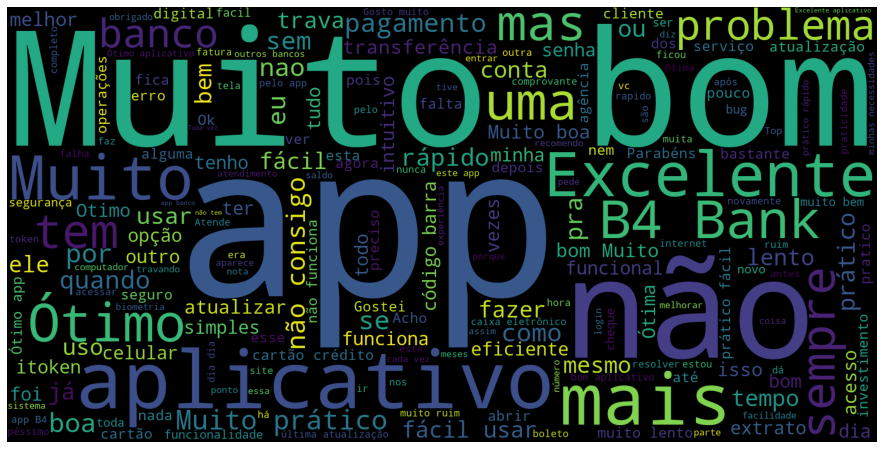

In [80]:
#aglomeração dos comentários para análise de wordcloud
all_summary = " ".join(s for s in textos)
 
#Palavras que ficarão fora da análise
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os","que","na","um","só","para","está","ainda"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("b4bank_summary_wordcloud.png")

In [81]:
#DOwnload da imagem em que será plotado
!wget "https://raw.githubusercontent.com/matheusfterra/B4Bank/master/images/1.jpg"
!ls

--2020-09-06 00:43:22--  https://raw.githubusercontent.com/matheusfterra/B4Bank/master/images/1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62498 (61K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>]  61.03K  --.-KB/s    in 0.03s   

2020-09-06 00:43:23 (2.15 MB/s) - ‘1.jpg’ saved [62498/62498]

1.jpg  b4bank_summary_wordcloud.png  data_scientist_case.xlsx  sample_data


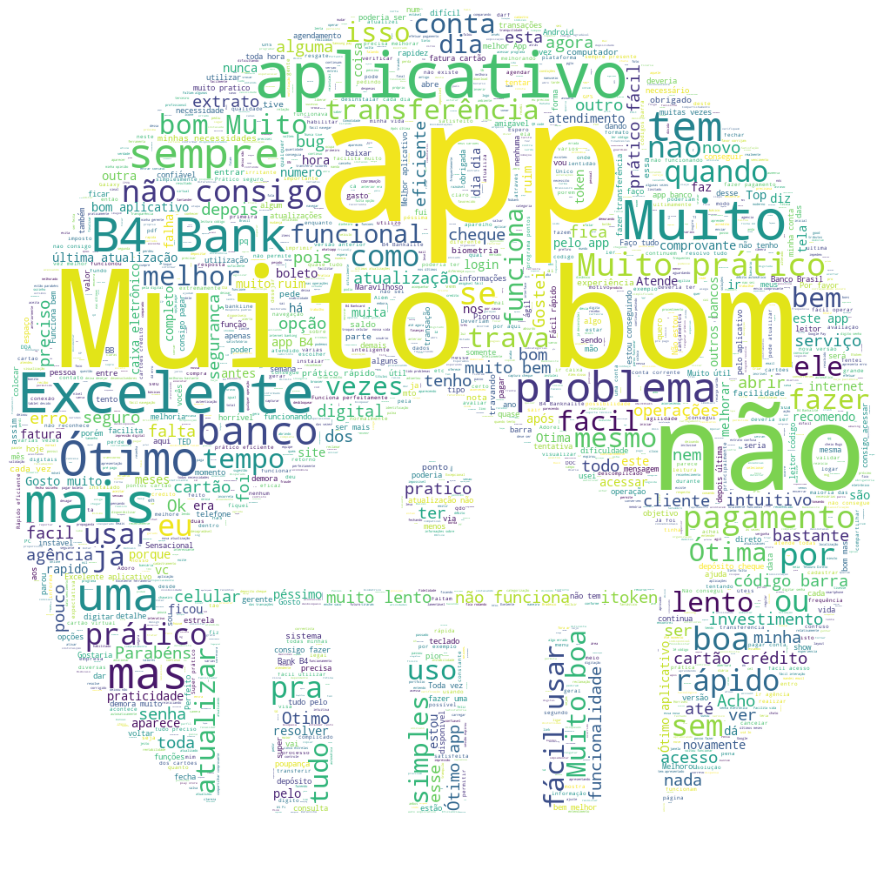

In [82]:
#Plotagem da wordcloud em uma imagem com um Banco no fundo
rio_mask = np.array(Image.open("1.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(16,16))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("b4bank_summary_wordcloud.png")

**EXPORT**

In [83]:
df_export_comments=df1.dropna(subset=['Review_Text'], axis=0)['Review_Text']

Predição por Machine Learning 
===========

In [84]:
#Separação do Dataframe por canal
df2_organic=df2.loc[df2["Acquisition_Channel"]=='Organic']
df2_third_party=df2.loc[df2["Acquisition_Channel"]=='Third-party referrers']
df2_other=df2.loc[df2["Acquisition_Channel"]=='Other']
df2_tracked_channels=df2.loc[df2["Acquisition_Channel"]=='Tracked channels (UTM)']

In [85]:
df2_organic.head(1)

,Date,Package_Name,Acquisition_Channel,Store_Listing_Visitors,Installers,Visitor_to_Installer_conversion_rate,Installers_retained_for_1_day,Installer_to_1_day_retention_rate,Installers_retained_for_7_days,Installer_to_7_days_retention_rate,Installers_retained_for_15_days,Installer_to_15_days_retention_rate,Installers_retained_for_30_days,Installer_to_30_days_retention_rate,Dia
0,2019-08-01,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797,3


In [86]:
#Algoritmo para aplicação do método de predição SVR
df2_organic_date=df2_organic["Date"]
df2_organic_visite=df2_organic["Store_Listing_Visitors"]

days=list()
visites=list()
i=0
for i in range(0,len(df2_organic_date)):
  i+=1
  days.append([int(i)])

for visite in df2_organic_visite:
	visites.append(float(visite))
 

In [87]:
#Aplicação dos métodos
lin_svr = SVR(kernel='linear', C=100)
lin_svr.fit(days,visites)

poly_svr=SVR(kernel='poly', C=1, degree=2)
poly_svr.fit(days,visites)

rbf_svr=SVR(kernel='rbf',C=0.5, gamma=0.15)
rbf_svr.fit(days,visites)

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

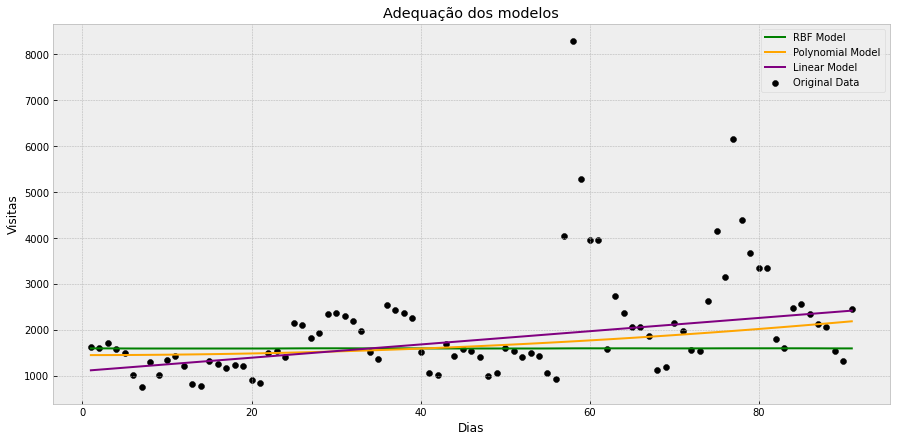

In [88]:
#Plotagem das predições
plt.figure(figsize=(15,7))
plt.title('Adequação dos modelos')
plt.xlabel('Dias')
plt.ylabel('Visitas')
plt.scatter(days,visites,color='black',label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.legend()
plt.show()

**EXPORT**

In [89]:
valor_aux=np.arange(1,92)

df_export_dia["Dia"]=valor_aux
df_export_dia["RBF_model"]=rbf_svr.predict(days)
df_export_dia["Polynomial_model"]=poly_svr.predict(days)
df_export_dia["Linear_model"]=lin_svr.predict(days)
df_export_dia

,Data,Avaliacao_media,Dia,RBF_model,Polynomial_model,Linear_model
0,2019-08-01,4.379747,1,1598.802275,1451.951519,1120.787324
1,2019-08-02,4.432432,2,1598.683817,1452.218279,1135.223944
2,2019-08-03,4.619718,3,1598.097515,1452.662881,1149.660563
3,2019-08-04,4.654321,4,1597.227135,1453.285322,1164.097183
4,2019-08-05,4.735294,5,1596.411786,1454.085605,1178.533803
...,...,...,...,...,...,...
86,2019-10-27,4.133333,87,1599.252671,2124.899987,2362.336620
87,2019-10-28,4.260870,88,1598.605844,2140.461031,2376.773239
88,2019-10-29,4.587786,89,1598.025035,2156.199916,2391.209859
89,2019-10-30,4.532110,90,1597.750630,2172.116641,2405.646479


In [90]:
day=110
the_day=[[day]]

print('A previsão pelo modelo RBF é: ',rbf_svr.predict(the_day)[0])
print('A previsão pelo modelo Linear é: ',lin_svr.predict(the_day)[0])
print('A previsão pelo modelo Polinomial é: ',poly_svr.predict(the_day)[0])

A previsão pelo modelo RBF é:  1597.7868695609286
A previsão pelo modelo Linear é:  2694.378873239242
A previsão pelo modelo Polinomial é:  2527.7976496409174


In [91]:
#Criação de 14 dias futuros para predição
days_predict=np.arange(91,106)
days_predict= [[num] for num in days_predict]

visites_predict=[]
for day in days_predict:
  visites_predict.append(round(lin_svr.predict([day])[0],2))

print(visites_predict)

[2420.08, 2434.52, 2448.96, 2463.39, 2477.83, 2492.27, 2506.7, 2521.14, 2535.58, 2550.01, 2564.45, 2578.89, 2593.32, 2607.76, 2622.2]


In [92]:
#Gráfico de Barras
days=np.arange(1,92)
days_predict=np.arange(91,106)
bar_plot=px.bar(x=days, y=visites,
           labels={'x':'Dias', 'y':'Visitas'})
bar_plot.add_bar(x=days_predict, y=visites_predict, name="Previsão")
#Alteração do Layout
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Previsões de acessos orgânicos')
#Saída do gráfico
bar_plot.show()

**EXPORT**

In [93]:
df_export_dia_predict=pd.DataFrame()
df_export_dia_predict["Dia"]=np.arange(1,106)
df_export_dia_predict["Visitas_organicas"]=visites+visites_predict[1:]


In [94]:
#Preparação do Dataset para aplicação do método Árvore de decisões
df_test = pd.DataFrame() 
df_test["Days"]=np.arange(1,92)
df_test["Visitas"]=visites


In [95]:
future_days = 15
df_test['Prediction'] = df_test[['Visitas']].shift(-future_days)
df_test.tail(4)

,Days,Visitas,Prediction
87,88,2069.0,NaN
88,89,1532.0,NaN
89,90,1326.0,NaN
90,91,2457.0,NaN


In [115]:
X = np.array(df_test.drop(['Prediction'], 1))[:-future_days]
y = np.array(df_test['Prediction'])[:-future_days]

In [116]:
#Separação dos dados para treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [117]:
#Criação do modelo Árvore de Decisão
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [118]:

x_future = df_test.drop(['Prediction'], 1)[:-future_days]

x_future = x_future.tail(future_days) 

x_future = np.array(x_future)


In [120]:
tree_prediction = tree.predict(x_future)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



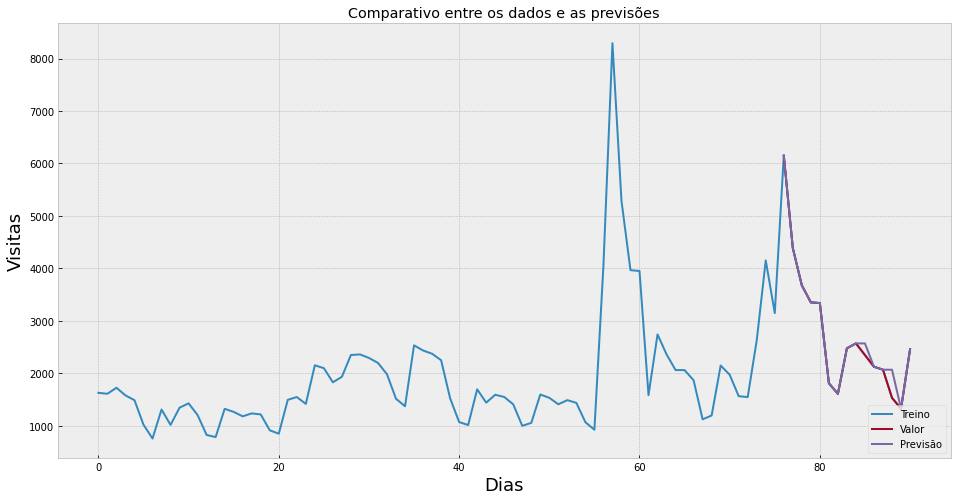

In [121]:
#Visualização das previsões
predictions = tree_prediction

valid =  df_test[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Comparativo entre os dados e as previsões')
plt.xlabel('Dias',fontsize=18)
plt.ylabel('Visitas',fontsize=18)
plt.plot(df_test['Visitas'])
plt.plot(valid[['Visitas','Predictions']])
plt.legend(['Treino', 'Valor', 'Previsão' ], loc='lower right')
plt.show()

In [122]:
#Calculo da precisão
precisao=accuracy_score(valid['Visitas'], valid['Predictions'])*100
print("O valor da acuracidade é de: {}".format(round(precisao,2)))

O valor da acuracidade é de: 86.67


In [103]:
#Algoritmo para aplicação do método de predição SVR
df2_organic_date=df2_organic["Date"]
df2_organic_installers=df2_organic["Installers"]

days=list()
installers=list()
i=0
for i in range(0,len(df2_organic_date)):
  i+=1
  days.append([int(i)])

for install in df2_organic_installers:
	installers.append(float(install))

In [104]:
#Aplicação dos métodos
lin_svr = SVR(kernel='linear', C=100)
lin_svr.fit(days,installers)

poly_svr=SVR(kernel='poly', C=1, degree=2)
poly_svr.fit(days,installers)

rbf_svr=SVR(kernel='rbf',C=0.5, gamma=0.15)
rbf_svr.fit(days,installers)

SVR(C=0.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [105]:
#Criação de 14 dias futuros para predição
days_predict=np.arange(91,106)
days_predict= [[num] for num in days_predict]

installers_predict=[]
for day in days_predict:
  installers_predict.append(round(lin_svr.predict([day])[0],2))

In [106]:
#Gráfico de Barras
days=np.arange(1,92)
days_predict=np.arange(91,106)
bar_plot=px.bar(x=days, y=installers,
           labels={'x':'Dias', 'y':'Instalações'})
bar_plot.add_bar(x=days_predict, y=installers_predict, name="Previsão")
#Alteração do Layout
bar_plot.update_layout(xaxis_tickangle=-45, title_text='Previsões de instalações orgânicas')
#Saída do gráfico
bar_plot.show()

In [107]:
df_export_dia_predict["Instalacoes_organicas"]=installers+installers_predict[1:]

In [108]:
print("O total de visitas previstas para as próximas 2 semanas, de forma orgânica é: {}\nCom um total de instalações previstas de: {}".format(sum(visites_predict),sum(installers_predict)))


O total de visitas previstas para as próximas 2 semanas, de forma orgânica é: 37817.1
Com um total de instalações previstas de: 6700.5


EXPORTA DATA TO BI
==========

**EXPORT TO EXCEL FILE**

In [109]:
writer = pd.ExcelWriter('my_dataset_bi.xlsx', engine='xlsxwriter')

df_export_semanal.to_excel(writer, sheet_name='Semanal', index=False)
df_export_diario.to_excel(writer, sheet_name='Diario', index=False)
df_export_canal.to_excel(writer, sheet_name='Canal', index=False)
df_export_retencao.to_excel(writer, sheet_name='Retencao', index=False)
df_export_idioma.to_excel(writer, sheet_name='Idioma', index=False)
df_export_sentimento.to_excel(writer, sheet_name='Sentimento', index=False)
df_export_dia.to_excel(writer, sheet_name='Dia', index=False)
df_export_dia_predict.to_excel(writer, sheet_name='Dia Predict', index=False)
df_export_comments.to_excel(writer, sheet_name='Comentarios', index=False)


writer.save()

files.download("my_dataset_bi.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>